Some general statistics on the nipponbare reference genome
* by chromosome 
    * size (nbases)
    * gene count
    * snp count
    * snps per gene

In [10]:
# set-up
%pylab inline
from sys import path
path.append('../scripts/')
from genome import genome

Populating the interactive namespace from numpy and matplotlib


In [21]:
#load genome
gff3File = '../data/MSU7/all.chrs.gff3'
fastaFile = '../data/MSU7/all.chrs.con'
mapFile = '../data/NB-core_v4/filtered.map.gz'
pedFile = '../data/NB-core_v4/filtered.ped.gz'

nippon = genome(gff3File, fastaFile, mapFile )

# Parsing annotation file : ../data/MSU7/all.chrs.gff3
# Parsing sequence file : ../data/MSU7/all.chrs.con
# Extracting sequences for genes...
# Parsing MAP file : ../data/NB-core_v4/filtered.map.gz
# Mapping snps to genes...


In [25]:
# get size of chromosomes
from Bio import SeqIO
chromsize = [ len(chrom.seq) for chrom in SeqIO.parse(fastaFile, 'fasta')]

# count snps per chromosome
snpchr = loadtxt(mapFile, usecols=[0], dtype=int)
snpcount = [sum(snpchr== i ) for i in range(1,13)]

# count genes per chromosome
genecount = [len(nippon[i]) for i in range(1,13)]


[6530, 5378, 5569, 5318, 4573, 4710, 4451, 4189, 3408, 3511, 4161, 4015] 55813


In [37]:
print 'chr\tlength\t\tgenes\tsnps\tsnps/gene'
for i in range(12) :
    print '{}\t{}\t{}\t{}\t{}'.format(i+1,chromsize[i],genecount[i],snpcount[i], \
                                      float(snpcount[i])/genecount[i])

chr	length		genes	snps	snps/gene
1	43270923	6530	20840	3.19142419602
2	35937250	5378	19241	3.57772406099
3	36413819	5569	18283	3.28299515173
4	35502694	5318	27537	5.17807446408
5	29958434	4573	24908	5.44675267877
6	31248787	4710	22624	4.8033970276
7	29697621	4451	22139	4.9739384408
8	28443022	4189	25040	5.97756027692
9	23012720	3408	17395	5.10416666667
10	23207287	3511	23032	6.55995442894
11	29021106	4161	26593	6.39101177602
12	27531856	4015	20546	5.11731008717


In [40]:
from parsers import ped_stats
pedFile = '../data/NB-core_v4/filtered.ped.gz'
pedst = ped_stats(pedFile)

# Parsing PED file : ../data/NB-core_v4/filtered.ped.gz


In [43]:
homolist = [s[0] for s in pedst.itervalues()]
hetelist = [s[1] for s in pedst.itervalues()]
misslist = [s[2] for s in pedst.itervalues()]

nhomo = sum(homolist)
nhete = sum(hetelist)
nmiss = sum(misslist)

print 'ratio of homozygous snps :',float(nhomo)/(nhomo+nhete+nmiss)

ratio of homozygous snps : 0.79081024182


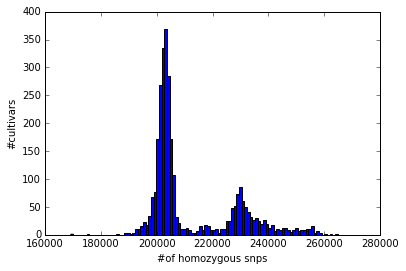

In [54]:
h1=hist(homolist, bins=100)
ylabel('#cultivars')
xlabel('#of homozygous snps');